In [1]:
# Importation of all libraries
import matplotlib.pyplot as plt # plot
import seaborn as sns # plot
import pandas as pd # to process our data 
import numpy as np # deal with the calculation
from datetime import * # deal with date format
import matplotlib.dates as mdates # for polyfit
import scipy.signal as ss # find peaks
import warnings # not showing unecessary warnings
warnings.simplefilter("ignore")
sns.set_theme()

------------------------------------------

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data preprocessing">Data preprocessing</a></span><ul class="toc-item"><li><span><a href="#1.-Openface-data" data-toc-modified-id="Openface-data">1.  Openface data</a></span>
    <ul class="toc-item"><li><span><a href="#1.1-Data-Importation" data-toc-modified-id="Data Importation">1.1. Data Importation</a></span></li><li><span><a href="#1.2-Check-for-NaN" data-toc-modified-id="Check for NaN">1.2. Check for NaN</a></span></li><li><span><a href="#1.3-How-to-find-the-starting-time-of-the-video" data-toc-modified-id="1.3. How to find the starting time of the video">1.3. How to find the starting time of the video</a></span></li><li><span><a href="#1.4-Filter-reliable-rows" data-toc-modified-id="1.4-Filter-reliable-rows">1.4 Filter reliable rows</a></span></li><li><span><a href="#1.5-Pupil-size-Calculation" data-toc-modified-id="Pupil size Calculation">1.5. Pupil size Calculation</a></span></li></ul></li></ul>
    <ul class="toc-item"><li><span><a href="#2.-Data-collected-by-hand-[supervisor]" data-toc-modified-id="2. Data collected by hand [supervisor]">2.  Data collected by hand [supervisor]</a></span><ul class="toc-item"><li><span><a href="#2.1-Separation-of-the-dataset-between-all-tests" data-toc-modified-id="Separation of the dataset between all tests">2.1. Separation of the dataset between all tests</a></span></li><li><span><a href="#2.2-Tests" data-toc-modified-id="Tests">2.2. Tests</a></span><ul class="toc-item"><li><span><a href="#2.2.1-Survey-1-(T-qu1)" data-toc-modified-id="2.2.1 Survey 1 (T qu1) ">2.2.1. Survey 1 (T qu1) </a></span></li><li><span><a href="#2.2.2-Cognitive-test" data-toc-modified-id="2.2.2 Cognitive test ">2.2.2. Cognitive test </a></span></li><li><span><a href="#2.2.3-Creativity-test-(t-creativity)" data-toc-modified-id="2.2.3 Creativity test (t creativity) ">2.2.3. Creativity test (t creativity) </a></span></li><li><span><a href="#2.2.4-Survey-2-(T-qu2)" data-toc-modified-id="2.2.4 Survey 2 (T qu2) ">2.2.4. Survey 2 (T qu2)  </a></span></li></ul></li></ul></li></ul><ul class="toc-item"><li><span><a href="#3.-Data-collected-by-hand-[survey]" data-toc-modified-id="3. Data collected by hand [survey]">3.  Data collected by hand [survey]</a></span><ul class="toc-item"><li><span><a href="#3.1-NaN-values" data-toc-modified-id="3.1 NaN values">3.1. NaN values</a></span></li><li><span><a href="#3.2-Creation-of-a-common-key-to-be-able-to-link-the-Openface-data-and-the-Survey-data" data-toc-modified-id="3.2 Creation of a common key to be able to link the Openface data and the Survey data">3.2. Creation of a common key to be able to link the Openface data and the Survey data </a></span></li></ul></li></ul><li><span><a href="#Analysis-of-a-single-subject" data-toc-modified-id="Analysis of a single subject">Analysis of a single subject</a></span><ul class="toc-item"><li><span><a href="#1.-Pupil-size-analysis" data-toc-modified-id="1. Pupil size analysis">1. Pupil size analysis</a></span></li></ul>
    <ul class="toc-item"><li><span><a href="#2.-Blink-rate-Calculation" data-toc-modified-id="2. Blink rate Calculation ">2. Blink rate Calculation </a></span></li><li><span><a href="#3.-Eyes-vs-Head-Position" data-toc-modified-id="3. Eyes vs Head Position">3. Eyes vs Head Position  </a></span></li></ul></li></ul></div>

-------------------------------------------------------

---------------------------------------------------

In this notebook, we will show the methodology followed in detail for one subject of one room. Note that all those steps have been condensed in a python file, that can be accessed in the folder "function". To make our code more readable and also highlight our result, the preprocessing and calculation won't be shown in other notebooks, but it works the same as the ones presented in this notebook. Moreover, you can find more information on each of the step on the report (accessible on Github).

# Data preprocessing

---------------------------------------------------

## 1. Openface data

---------------------------------------------------

### 1.1 Data Importation

In [2]:
# loading one csv
FILE = "webcam_2021-07-20-16-49.csv"
TXTFILE = "2243_txt_file_in_csv.csv"

df = pd.read_csv(FILE)
df["Openface_file"] = FILE # adding the name of the current file in the dataset

FILESTART = FILE.replace(".csv", "_of_details.txt") # formating "FILE" to access to the corresponfing file name in "TXTFILE"

dftxt = pd.read_csv(TXTFILE, sep=';', engine='python')

---------------------------------------------------

### 1.2 Check for NaN

In [3]:
# Checking if there is Nan in the table df
df.isnull().sum()
print("Number of Nan: " + str(df.isnull().sum().sum()))

Number of Nan: 0


In [4]:
# Checking if there is Nan in the table dftxt
dftxt.isnull().sum()
print("Number of Nan: " + str(dftxt.isnull().sum().sum()))

Number of Nan: 0


---------------------------------------------------

### 1.3 How to find the starting time of the video

In [5]:
# getting the parameters
timeCSV = dftxt["time"][dftxt['File_name'] == FILESTART].values
yearCSV = dftxt["year"][dftxt['File_name'] == FILESTART].values
monthCSV = dftxt["month"][dftxt['File_name'] == FILESTART].values
dayCSV = dftxt["day"][dftxt['File_name'] == FILESTART].values

# month to number
if str(monthCSV[0]) == "May":
    month = str(monthCSV[0]).replace("May", "5")
elif str(monthCSV[0]) == "Jun":
    month = str(monthCSV[0]).replace("Jun", "6")
elif str(monthCSV[0]) == "Jul":
    month = str(monthCSV[0]).replace("Jul", "7")
    
total = str(yearCSV[0]) + '-' + month + '-' + str(dayCSV[0]) + ' ' + timeCSV[0]

# getting the starting time in the good format

date_format_str = '%Y-%m-%d %H:%M:%S'
startTIME = datetime.strptime(total, date_format_str)
print("Starting time of the experiment : ",startTIME)

Starting time of the experiment :  2021-07-20 16:49:33


In [6]:
# adding starting time to the dataset
def add_timeline(df,startTIME):
    
    ''' 
    Input: the df with time as interval from the starttime to each frame
               the starting time 
               
    Output: the same df but with a new column representing the correct time
    
    '''
    df=df.copy()
    df.insert(0, 'time', startTIME)
    df.time= df.apply(lambda x: pd.to_datetime(x.time)+pd.Timedelta(x[' timestamp'],unit='second',) ,axis = 1)
    return df

In [7]:
df_=add_timeline(df,startTIME)
print("First frame :")
display(df_.head(1))
print("Last frame :" )
display(df_.tail(1))

First frame :


,time,frame,face_id,timestamp,confidence,success,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,...,eye_lmk_Z_55,pose_Tx,pose_Ty,pose_Tz,pose_Rx,pose_Ry,pose_Rz,AU45_r,AU45_c,Openface_file
0,2021-07-20 16:49:33.584,1,0,0.584,0.98,1,-0.058666,0.142808,-0.98801,-0.144435,...,354.7,34.2,-13.7,424.3,-0.035,0.087,0.001,0.0,0.0,webcam_2021-07-20-16-49.csv


Last frame :


,time,frame,face_id,timestamp,confidence,success,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,...,eye_lmk_Z_55,pose_Tx,pose_Ty,pose_Tz,pose_Rx,pose_Ry,pose_Rz,AU45_r,AU45_c,Openface_file
74961,2021-07-20 17:37:41.871,74962,0,2888.871,0.0,0,-0.544281,0.452695,-0.706276,-0.513348,...,2555.1,62.0,48.3,2612.9,1.982,0.89,-1.681,0.0,0.0,webcam_2021-07-20-16-49.csv


---------------------------------------------------

### 1.4 Filter reliable rows

Here we only take the frame where we have a good probability that our subject is detected

In [8]:
df__=df_[df_[' success']==1]
df_withsubject=df__[df__[' confidence']>0.95] 
ratio_kept=(df_withsubject.shape[0]/df_.shape[0])*100
print("ratio kept:", ratio_kept,"%")

ratio kept: 65.00626984338732 %


In [9]:
df_withsubject[" confidence"].unique() # Check the values of "confidence" Here we only have a confidence of 98 %

array([0.98])

---------------------------------------------------

## 1. Pupil size Calculation

In [10]:
# Rename columns to make it lighter
left20= df_[[" eye_lmk_X_20", " eye_lmk_Y_20", " eye_lmk_Z_20"]].rename(columns={' eye_lmk_X_20': 'x', ' eye_lmk_Y_20': 'y', ' eye_lmk_Z_20': 'z'})
left21= df_[[" eye_lmk_X_21", " eye_lmk_Y_21", " eye_lmk_Z_21"]].rename(columns={' eye_lmk_X_21': 'x', ' eye_lmk_Y_21': 'y', ' eye_lmk_Z_21': 'z'})
left22= df_[[" eye_lmk_X_22", " eye_lmk_Y_22", " eye_lmk_Z_22"]].rename(columns={' eye_lmk_X_22': 'x', ' eye_lmk_Y_22': 'y', ' eye_lmk_Z_22': 'z'})
left23= df_[[" eye_lmk_X_23", " eye_lmk_Y_23", " eye_lmk_Z_23"]].rename(columns={' eye_lmk_X_23': 'x', ' eye_lmk_Y_23': 'y', ' eye_lmk_Z_23': 'z'})
left24= df_[[" eye_lmk_X_24", " eye_lmk_Y_24", " eye_lmk_Z_24"]].rename(columns={' eye_lmk_X_24': 'x', ' eye_lmk_Y_24': 'y', ' eye_lmk_Z_24': 'z'})
left25= df_[[" eye_lmk_X_25", " eye_lmk_Y_25", " eye_lmk_Z_25"]].rename(columns={' eye_lmk_X_25': 'x', ' eye_lmk_Y_25': 'y', ' eye_lmk_Z_25': 'z'})
left26= df_[[" eye_lmk_X_26", " eye_lmk_Y_26", " eye_lmk_Z_26"]].rename(columns={' eye_lmk_X_26': 'x', ' eye_lmk_Y_26': 'y', ' eye_lmk_Z_26': 'z'})
left27= df_[[" eye_lmk_X_27", " eye_lmk_Y_27", " eye_lmk_Z_27"]].rename(columns={' eye_lmk_X_27': 'x', ' eye_lmk_Y_27': 'y', ' eye_lmk_Z_27': 'z'})

# Pythagore formula to get the diameter
def pythagore_dist_3D(p,q):
    return np.sqrt((p.x-q.x)**2+(p.y-q.y)**2+(p.z-q.z)**2)

# Getting 4 diameters of opposed points
diam1=pythagore_dist_3D(left24,left20)
diam2=pythagore_dist_3D(left25,left21)
diam3=pythagore_dist_3D(left26,left22)
diam4=pythagore_dist_3D(left27,left23)

# Mean calculation
pupil_diam_mean = (diam1 + diam2 + diam3 + diam4)/4

# Add pupil diameter to dataset
df_withsubject['pupil_diam_mean'] = pupil_diam_mean

In [11]:
# Cleaning the dataset with dropping culumns used for pupil size
df_cleaned = df_.drop([" face_id"," eye_lmk_X_20", " eye_lmk_Y_20", " eye_lmk_Z_20"
," eye_lmk_X_21", " eye_lmk_Y_21", " eye_lmk_Z_21"
," eye_lmk_X_22", " eye_lmk_Y_22", " eye_lmk_Z_22"
," eye_lmk_X_23", " eye_lmk_Y_23", " eye_lmk_Z_23"
," eye_lmk_X_24", " eye_lmk_Y_24", " eye_lmk_Z_24"
," eye_lmk_X_25", " eye_lmk_Y_25", " eye_lmk_Z_25"
," eye_lmk_X_26", " eye_lmk_Y_26", " eye_lmk_Z_26"
," eye_lmk_X_27", " eye_lmk_Y_27", " eye_lmk_Z_27"," eye_lmk_X_48", " eye_lmk_Y_48", " eye_lmk_Z_48"
," eye_lmk_X_49", " eye_lmk_Y_49", " eye_lmk_Z_49"
," eye_lmk_X_50", " eye_lmk_Y_50", " eye_lmk_Z_50"
," eye_lmk_X_51", " eye_lmk_Y_51", " eye_lmk_Z_51"
," eye_lmk_X_52", " eye_lmk_Y_52", " eye_lmk_Z_52"
," eye_lmk_X_53", " eye_lmk_Y_53", " eye_lmk_Z_53"
," eye_lmk_X_54", " eye_lmk_Y_54", " eye_lmk_Z_54"
," eye_lmk_X_55", " eye_lmk_Y_55", " eye_lmk_Z_55"],axis=1)

In [12]:
print("Pupil size added:")
df_cleaned.head(1)

Pupil size added:


,time,frame,timestamp,confidence,success,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,...,gaze_angle_y,pose_Tx,pose_Ty,pose_Tz,pose_Rx,pose_Ry,pose_Rz,AU45_r,AU45_c,Openface_file
0,2021-07-20 16:49:33.584,1,0.584,0.98,1,-0.058666,0.142808,-0.98801,-0.144435,0.166274,...,0.156,34.2,-13.7,424.3,-0.035,0.087,0.001,0.0,0.0,webcam_2021-07-20-16-49.csv


---------------------------------------------------

## 2. Data collected by hand [supervisor]

---------------------------------------------------

### 2.1 Separation of the dataset between all tests

In [13]:
# import of the csv made by the supervisor
bh=pd.read_excel("Data//BP_Results_by_hand_v3_2021-11-12.xlsx")
currentfile=bh[bh["Openface_file"]==FILE] # filter the data linked to the current file

# merge with openface dataset
df_merge=df_.merge(currentfile,on="Openface_file")

In [14]:
bh.head(1)

,Openface_file,session_ID,date,condition,user_ID,session_1_2,room,OLD_exposure_nr,exposure_nr,VIP_ID,...,t_qu2_start_UC,t_qu2_end_UC,t_session_end_BH,t_measure_2_BH,meas_2_Ev_screen_on,meas_2_Ev_screen_off,meas_2_lux_desk,weather,comment,remarks
0,webcam_2021-05-18-13-49.csv,1,2021-05-18,NG,301,1,BP 2243 (BB),1_301_NG_Clear,301_NG_1_Clear,A2,...,2021-05-18 14:34:08,2021-05-18 14:37:23,14:38:00,14:38:00,3260,3200,1360,NaN,VIP 30 sec. interval,"trop petite, absente toute la fin de la vidéo"


### 2.2 Tests

#### 2.2.1 Survey 1 (T qu1) 

In [15]:
timestamp_qu1 = str(df_merge['t_qu1_end_UC'][0])
date_format_str = '%Y-%m-%d %H:%M:%S'
end_time_qu1 = datetime.strptime(timestamp_qu1, date_format_str)

t_qu1_start_REAL = end_time_qu1 - timedelta(minutes=3)

print("\n Survey 1 begins at " + str(t_qu1_start_REAL) + " and stops at " + str(df_merge['t_qu1_end_UC'][0]) + ". Duration is "+ str(df_merge['t_qu1_end_UC'][0]-t_qu1_start_REAL)+ "\n")
delta_t1 = df_merge['t_qu1_end_UC'][0] - t_qu1_start_REAL

# getting the rows for the first test
mask = (df_withsubject['time'] >= t_qu1_start_REAL) & (df_withsubject['time'] <= df_merge['t_qu1_end_UC'][0])
tqu1 = df_withsubject.loc[mask]

mask_ = (df_merge['time'] >= t_qu1_start_REAL) & (df_merge['time'] <= df_merge['t_qu1_end_UC'][0])
tqu1_ = df_merge.loc[mask_]


 Survey 1 begins at 2021-07-20 16:58:41 and stops at 2021-07-20 17:01:41. Duration is 0 days 00:03:00



#### 2.2.2 Cognitive test 

##### Cognitive test 1 (Cog1 Stroop) 

In [16]:
start_cog1=pd.Timestamp(year=df_merge['date'][0].year,
             month=df_merge['date'][0].month,
             day=df_merge['date'][0].day,
             hour=df_merge['cog1_STROOP_start'][0].hour,
             minute=df_merge['cog1_STROOP_start'][0].minute,
             second=df_merge['cog1_STROOP_start'][0].second)
end_cog1=pd.Timestamp(year=df_merge['date'][0].year,
             month=df_merge['date'][0].month,
             day=df_merge['date'][0].day,
             hour=df_merge['cog1_STROOP_end'][0].hour,
             minute=df_merge['cog1_STROOP_end'][0].minute,
             second=df_merge['cog1_STROOP_end'][0].second)

print("\n Cognitive test 1 starts at "+str(start_cog1)+" and ends at "+ str(end_cog1)+ ". Duration is : "+ str(end_cog1-start_cog1)+"\n")

# getting the rows for the third test cog2_SART_start
mask = (df_withsubject['time'] >= start_cog1) & (df_withsubject['time'] <= end_cog1)

'''
Create a df regrouping the data of this test

'''
delta_t2= end_cog1-start_cog1
cog1 = df_withsubject.loc[mask]

mask_ = (df_merge['time']>=start_cog1) & (df_merge['time']<=end_cog1)
cog1_ = df_merge.loc[mask_]


 Cognitive test 1 starts at 2021-07-20 17:07:13 and ends at 2021-07-20 17:09:06. Duration is : 0 days 00:01:53



##### Cognitive test 2 (Cog 2 SART) 

In [17]:
start_cog2=pd.Timestamp(year=df_merge['date'][0].year,
             month=df_merge['date'][0].month,
             day=df_merge['date'][0].day,
             hour=df_merge['cog2_SART_start'][0].hour,
             minute=df_merge['cog2_SART_start'][0].minute,
             second=df_merge['cog2_SART_start'][0].second)
end_cog2=pd.Timestamp(year=df_merge['date'][0].year,
             month=df_merge['date'][0].month,
             day=df_merge['date'][0].day,
             hour=df_merge['cog2_SART_end'][0].hour,
             minute=df_merge['cog2_SART_end'][0].minute,
             second=df_merge['cog2_SART_end'][0].second)
print(" \n Cognitive test 2 starts at "+str(start_cog2)+" and ends at "+ str(end_cog2)+ ". Duration is : "+ str(end_cog2-start_cog2)+"\n")

# getting the rows for the third test cog2_SART_start
mask = (df_withsubject['time']>=start_cog2) & (df_withsubject['time']<=end_cog2)

'''
Create a df regrouping the data of this test

'''
delta_t3=end_cog2-start_cog2
cog2 = df_withsubject.loc[mask]

mask_ = (df_merge['time']>=start_cog2) & (df_merge['time']<=end_cog2)
cog2_ = df_merge.loc[mask_]

 
 Cognitive test 2 starts at 2021-07-20 17:09:08 and ends at 2021-07-20 17:14:56. Duration is : 0 days 00:05:48



##### Cognitive test 3 (Cog 3 NBACK) 

In [18]:
start_cog3=pd.Timestamp(year=df_merge['date'][0].year,
             month=df_merge['date'][0].month,
             day=df_merge['date'][0].day,
             hour=df_merge['cog3_NBACK_start'][0].hour,
             minute=df_merge['cog3_NBACK_start'][0].minute,
             second=df_merge['cog3_NBACK_start'][0].second)
end_cog3=pd.Timestamp(year=df_merge['date'][0].year,
             month=df_merge['date'][0].month,
             day=df_merge['date'][0].day,
             hour=df_merge['cog3_NBACK_end'][0].hour,
             minute=df_merge['cog3_NBACK_end'][0].minute,
             second=df_merge['cog3_NBACK_end'][0].second)
print("\n Cognitive test 3 starts at "+str(start_cog3)+" and ends at "+ str(end_cog3)+ ". Duration is : "+ str(end_cog3-start_cog3)+"\n")

# getting the rows for the third test cog3_NBACK_start
mask = (df_withsubject['time']>=start_cog3) & (df_withsubject['time']<=end_cog3)

'''
Create a df regrouping the data of this test

'''

cog3 = df_withsubject.loc[mask]
delta_t4=end_cog3-start_cog3

mask_ = (df_merge['time']>=start_cog3) & (df_merge['time']<=end_cog3)
cog3_ = df_merge.loc[mask_]


 Cognitive test 3 starts at 2021-07-20 17:14:57 and ends at 2021-07-20 17:21:16. Duration is : 0 days 00:06:19



In [19]:
print(" \n Total duration : "+str((end_cog1-start_cog1)+(end_cog2-start_cog2)+(end_cog3-start_cog3)))

 
 Total duration : 0 days 00:14:00


#### 2.2.3 Creativity test (T creativity)

In [20]:
start_creativity=df_merge['t_creativity_start_BH'][0]
end_creativity=df_merge['t_creativity_end_UC'][0]
print("\n The creativity test starts at "+str(start_creativity)+" and ends at "+ str(end_creativity)+ ". Duration is :"+ str(end_creativity-start_creativity)+"\n")

# getting the rows for test
mask = (df_withsubject['time']>df_merge['t_creativity_start_BH'][0]) & (df_withsubject['time']<df_merge['t_creativity_end_UC'][0])

'''
Create a df regrouping the data of this test

'''

creativity = df_withsubject.loc[mask]
delta_t5 = end_creativity-start_creativity

mask_ = (df_merge['time']>df_merge['t_creativity_start_BH'][0]) & (df_merge['time']<df_merge['t_creativity_end_UC'][0])
creativity_ = df_merge.loc[mask_]


 The creativity test starts at 2021-07-20 17:23:40 and ends at 2021-07-20 17:28:22. Duration is :0 days 00:04:42



#### 2.2.4 Survey 2 (T qu2) 

In [21]:
timestamp_crea = str(end_creativity)
end_time_crea = datetime.strptime(timestamp_crea, date_format_str)

t_qu2_start_REAL = end_time_crea + timedelta(seconds=20)

end_tqu2 = df_merge['t_qu2_end_UC'][0]
print(" \n Survey 2 starts at "+str(t_qu2_start_REAL)+ " and ends at " + str(end_tqu2)+ ". Duration is : "+ str(end_tqu2-t_qu2_start_REAL)+"\n")

# getting the rows for the first test
mask = (df_withsubject['time']>t_qu2_start_REAL) & (df_withsubject['time']<df_merge['t_qu2_end_UC'][0])

'''
Create a df regrouping the data of this test

'''

tqu2 = df_withsubject.loc[mask]
delta_t6 = end_tqu2-t_qu2_start_REAL

mask_ = (df_merge['time']>t_qu2_start_REAL) & (df_merge['time']<df_merge['t_qu2_end_UC'][0])
tqu2_ = df_merge.loc[mask_]

 
 Survey 2 starts at 2021-07-20 17:28:42 and ends at 2021-07-20 17:32:54. Duration is : 0 days 00:04:12



-------------------------------------------------

## 3. Data collected by hand [survey]

In this section, we preprocess the dataset survey to be able to do some analysis with the Openface data

In [22]:
# loading datasets
FILE_SURVEY = "Data//data_exposure_survey_small.csv"
df_srvey=pd.read_csv(FILE_SURVEY)

---------------------------------------------------

 No filter was used on the "erase" column as all the rows have "keep" as parameter. 

In [23]:
# columns chosen for the analysis after discussion with the supervisor
COLUMNS = ['p_ID', 'unique_qu_ID',
       'visual_comfort', 'glare_Osterhaus', 'glare_binary']
survey=df_srvey[COLUMNS]

In [24]:
survey.head(1)

,p_ID,unique_qu_ID,visual_comfort,glare_Osterhaus,glare_binary
0,301,301_NG_1_Clear_q1,Comfortable,Noticeable,No


---------------------------------------------------

### 3.1 NaN values

In [25]:
survey.isnull().describe()

,p_ID,unique_qu_ID,visual_comfort,glare_Osterhaus,glare_binary
count,256,256,256,256,256
unique,1,1,2,2,2
top,False,False,False,False,False
freq,256,256,255,255,255


In [26]:
survey[survey.visual_comfort.isnull()]

,p_ID,unique_qu_ID,visual_comfort,glare_Osterhaus,glare_binary
208,353,353_G1_1_Clear_q1,NaN,NaN,NaN


In [27]:
# Drop the line with NaN values
survey_clean=survey.drop(survey[survey.visual_comfort.isnull()].index,axis=0)

In [28]:
survey_clean.isnull().describe()

,p_ID,unique_qu_ID,visual_comfort,glare_Osterhaus,glare_binary
count,255,255,255,255,255
unique,1,1,1,1,1
top,False,False,False,False,False
freq,255,255,255,255,255


In [29]:
# Checking the NaNs
print("Modification on the dataset (check): \n Raw dataset:", survey.glare_binary.unique(),"----> Cleaned dataset:",survey_clean.glare_binary.unique())

Modification on the dataset (check): 
 Raw dataset: ['No' 'Yes' nan] ----> Cleaned dataset: ['No' 'Yes']


---------------------------------

### 3.2 Creation of a common key to be able to link the Openface data and the Survey data 

In this section, we are creating the column "exposure_nr" with the same format of the one in the Openface data. To do that, we extract the information from "unique_qu_ID" which represents the same but with a other format.

In [30]:
# function that remove the last part of the unique_qu_ID (any combination of the keys can be find by changing the return) 
def remove_q_(string):
    extraction= [string[:3],string[4:6],string[7:8],string[9:14]]
    return str(extraction[0]+'_'+extraction[1]+'_'+extraction[2]+'_'+extraction[3])

In [31]:
survey_clean['exposure_nr']=survey_clean['unique_qu_ID'].apply(remove_q_)

In [32]:
survey_clean.head(1)

,p_ID,unique_qu_ID,visual_comfort,glare_Osterhaus,glare_binary,exposure_nr
0,301,301_NG_1_Clear_q1,Comfortable,Noticeable,No,301_NG_1_Clear


In [33]:
survey_clean.to_csv("Data/survey_clean.csv")

------------------------------------------------------------------

# Analysis of a single subject

Now that we have preproccess all our datasets, we can start to combine all of them together.

------------------------------------------------------------------

## 1. Pupil size analysis

In [34]:
tqu1['pupil_diam_mean']

13488    5.538247
13489    5.467145
13490    5.585967
13506    5.432055
13507    5.415685
           ...   
18442    6.174064
18443    6.129734
18444    6.252043
18445    6.263356
18446    6.244167
Name: pupil_diam_mean, Length: 4735, dtype: float64

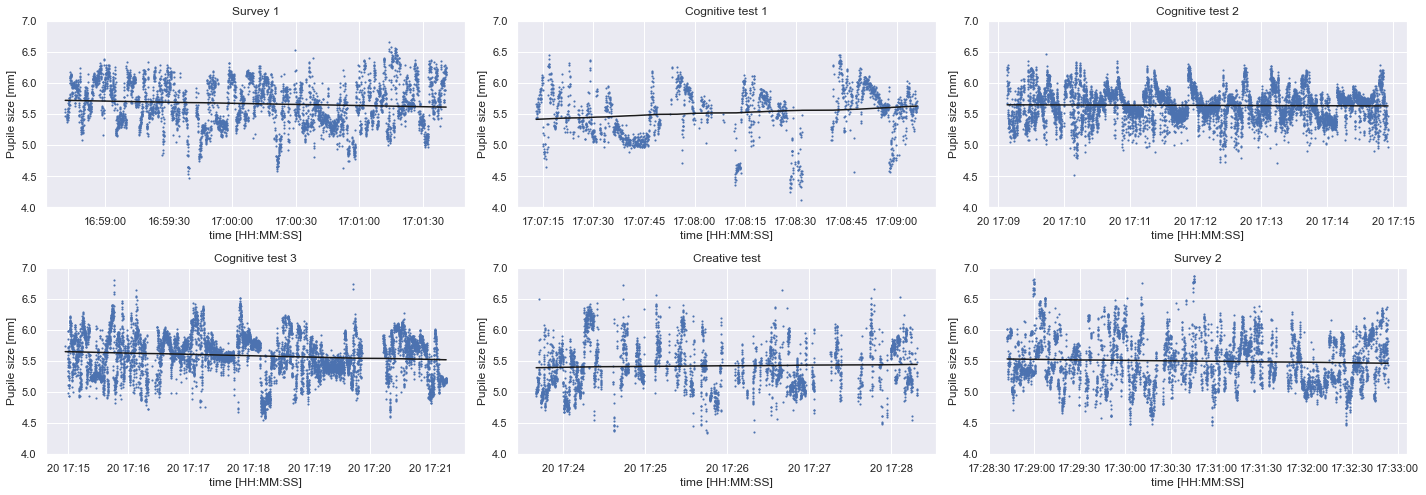

In [35]:
fig=plt.figure(figsize=(20,10))
for i,j,n in zip([tqu1, cog1, cog2, cog3, creativity, tqu2],
               ['Survey 1','Cognitive test 1','Cognitive test 2','Cognitive test 3','Creative test','Survey 2'],[1,2,3,4,5,6]):
    
    #polyfit calculation
    x= mdates.date2num(i.time)
    y = i['pupil_diam_mean']
    mymodel = np.poly1d(np.polyfit(x, y, 1))
    xx = np.linspace(x.min(), x.max(), i['pupil_diam_mean'].shape[0])
    dd = mdates.num2date(x)
    #base plot + polyfit
    plt.subplot(3,3,n)
    plt.scatter(i['time'],i['pupil_diam_mean'],marker=".",s=5)
    plt.plot(dd, mymodel(xx),"k")
    plt.xlabel('time [HH:MM:SS]')
    plt.ylabel('Pupile size [mm]')
    plt.ylim([4,7])
    plt.title(j)
fig.tight_layout()
plt.show()

Next we can plot the boxplot for each tests ( if you are not familiar with boxplot you can check: ['How to analyse boxplot here'](https://us-static.z-dn.net/files/dc6/6e6c552d01e2763bf2272aed95107758.jpeg) + the green triangle shows the means )

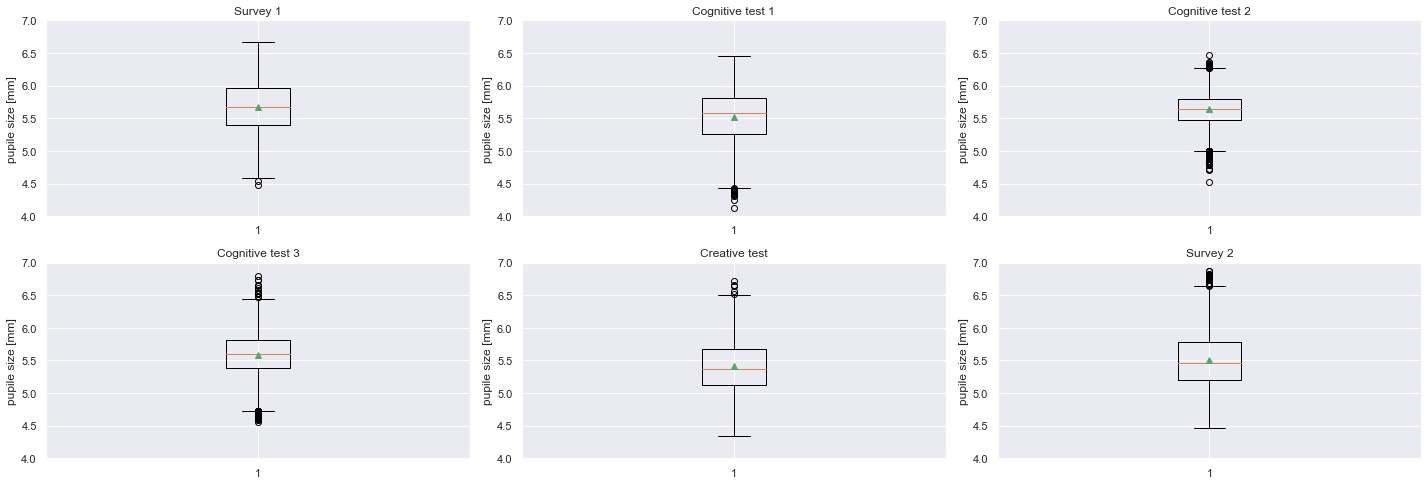

In [71]:
fig=plt.figure(figsize=(20,10))
for i,j,n in zip([tqu1, cog1, cog2, cog3, creativity, tqu2],
               ['Survey 1','Cognitive test 1','Cognitive test 2','Cognitive test 3','Creative test','Survey 2'],[1,2,3,4,5,6]):
    #base plot + polyfit
    plt.subplot(3,3,n)
    plt.boxplot(i['pupil_diam_mean'],showmeans=True)
    plt.ylabel('pupile size [mm]')
    plt.ylim([4,7])
    plt.title(j)
fig.tight_layout()
plt.show()

In [38]:
df_stat= pd.DataFrame(index={FILE},data={
       'Survey 1 Dmean pupil' : tqu1['pupil_diam_mean'].describe()['mean'],
       'Cognitive test 1 Dmean pupil' : cog1['pupil_diam_mean'].describe()['mean'], 
       'Cognitive test 2 Dmean pupil' : cog2['pupil_diam_mean'].describe()['mean'],
       'Cognitive test 3 Dmean pupil' : cog3['pupil_diam_mean'].describe()['mean'], 
       'Creative test Dmean pupil' : creativity['pupil_diam_mean'].describe()['mean'],
       'Survey 2 Dmean pupil' : tqu2['pupil_diam_mean'].describe()['mean']})
df_stat

,Survey 1 Dmean pupil,Cognitive test 1 Dmean pupil,Cognitive test 2 Dmean pupil,Cognitive test 3 Dmean pupil,Creative test Dmean pupil,Survey 2 Dmean pupil
webcam_2021-07-20-16-49.csv,5.669029,5.526785,5.642986,5.588416,5.416372,5.499676


------------------------------------------------------------------

## 2. Blink rate Calculation 

In [39]:
tqu1.shape[0]/tqu1_.shape[0]

0.9548296027424884

Survey 1 number of peaks during the test : 15.0  [blink/min]
Survey 1 number of peaks during the test 2 : 16.0  [blink/min]
Cognitive test 1 number of peaks during the test : 28.0  [blink/min]
Cognitive test 1 number of peaks during the test 2 : 43.0  [blink/min]
Cognitive test 2 number of peaks during the test : 23.0  [blink/min]
Cognitive test 2 number of peaks during the test 2 : 25.0  [blink/min]
Cognitive test 3 number of peaks during the test : 12.0  [blink/min]
Cognitive test 3 number of peaks during the test 2 : 12.0  [blink/min]
Creative test number of peaks during the test : 5.0  [blink/min]
Creative test number of peaks during the test 2 : 9.0  [blink/min]
Survey 2 number of peaks during the test : 3.0  [blink/min]
Survey 2 number of peaks during the test 2 : 4.0  [blink/min]


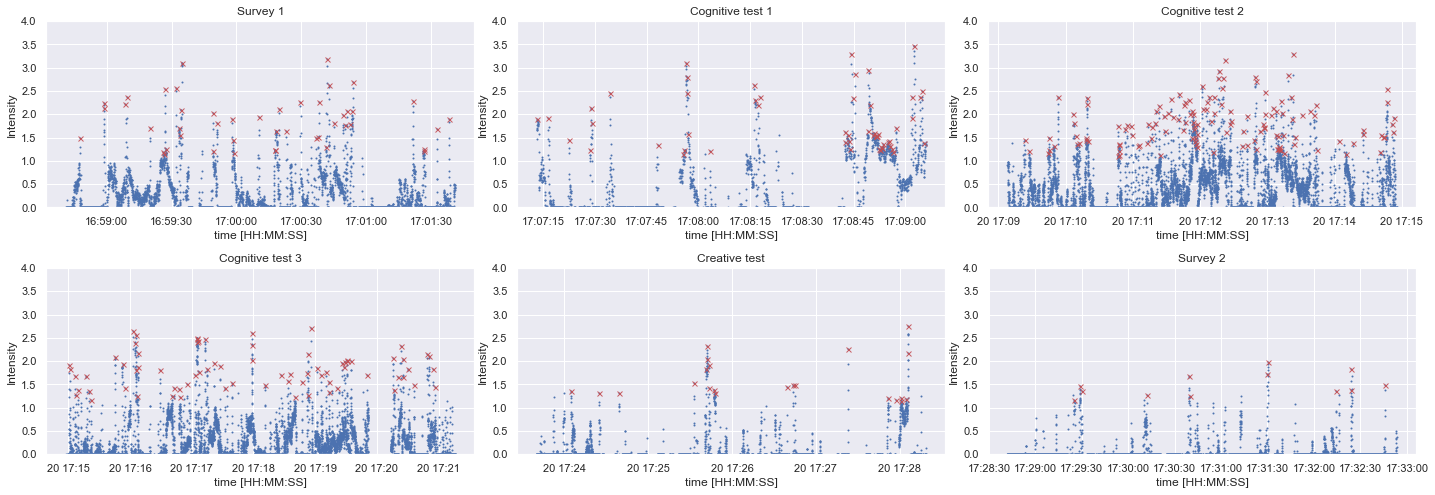

In [71]:
fig=plt.figure(figsize=(20,10))
for i,j,n in zip([(tqu1,delta_t1,tqu1_), (cog1,delta_t2,cog1_), (cog2,delta_t3,cog2_), (cog3,delta_t4,cog3),
                  (creativity,delta_t5,creativity_), (tqu2,delta_t6,tqu2_)],
               ['Survey 1','Cognitive test 1','Cognitive test 2','Cognitive test 3','Creative test','Survey 2'],[1,2,3,4,5,6]):
    # query the intensity over 1
    mask = i[0][' AU45_r'] >= 1
    filtered = i[0][mask]
    
    # to numpy in order to use findpeak function
    AU45_r_array = filtered[' AU45_r'].to_numpy()
    filtered = filtered.reset_index()
    
    # finding peaks
    peaks, _ = ss.find_peaks(AU45_r_array,prominence=0.1)
    peaks_as_time = filtered.loc[peaks]
    #number of peaks (We are taking into account the data which are suppressed due to their confidence score, etc.)
    print(j,"number of peaks during the task:",np.round((60*len(peaks)/i[1].seconds)/(i[0].shape[0]/i[2].shape[0]))," [blink/min]")
    # plot    
    plt.subplot(3,3,n)
    plt.plot(peaks_as_time['time'], peaks_as_time[' AU45_r'], "x", markersize=5, color='r',alpha=0.9)
    plt.scatter(i[0]['time'], i[0][' AU45_r'],s=1)
    plt.xlabel('time [HH:MM:SS]')
    plt.ylabel('Intensity')
    plt.ylim([0,4])
    plt.title(j)
    
fig.tight_layout()
plt.show()


------------------------------------------------------------------

## 3. Eyes vs Head Position 

In [37]:
#create a df in degree from rad 
COLUMNS_VECTOR=[' gaze_angle_x', ' gaze_angle_y', ' pose_Rx', ' pose_Ry'] #columns link to the position of the head
df_ws=df_[COLUMNS_VECTOR]
df_ws_deg=df_ws.copy()*180/np.pi # to degree
df_ws_deg.head(1)

,gaze_angle_x,gaze_angle_y,pose_Rx,pose_Ry
0,-5.901465,8.938142,-2.005352,4.984733


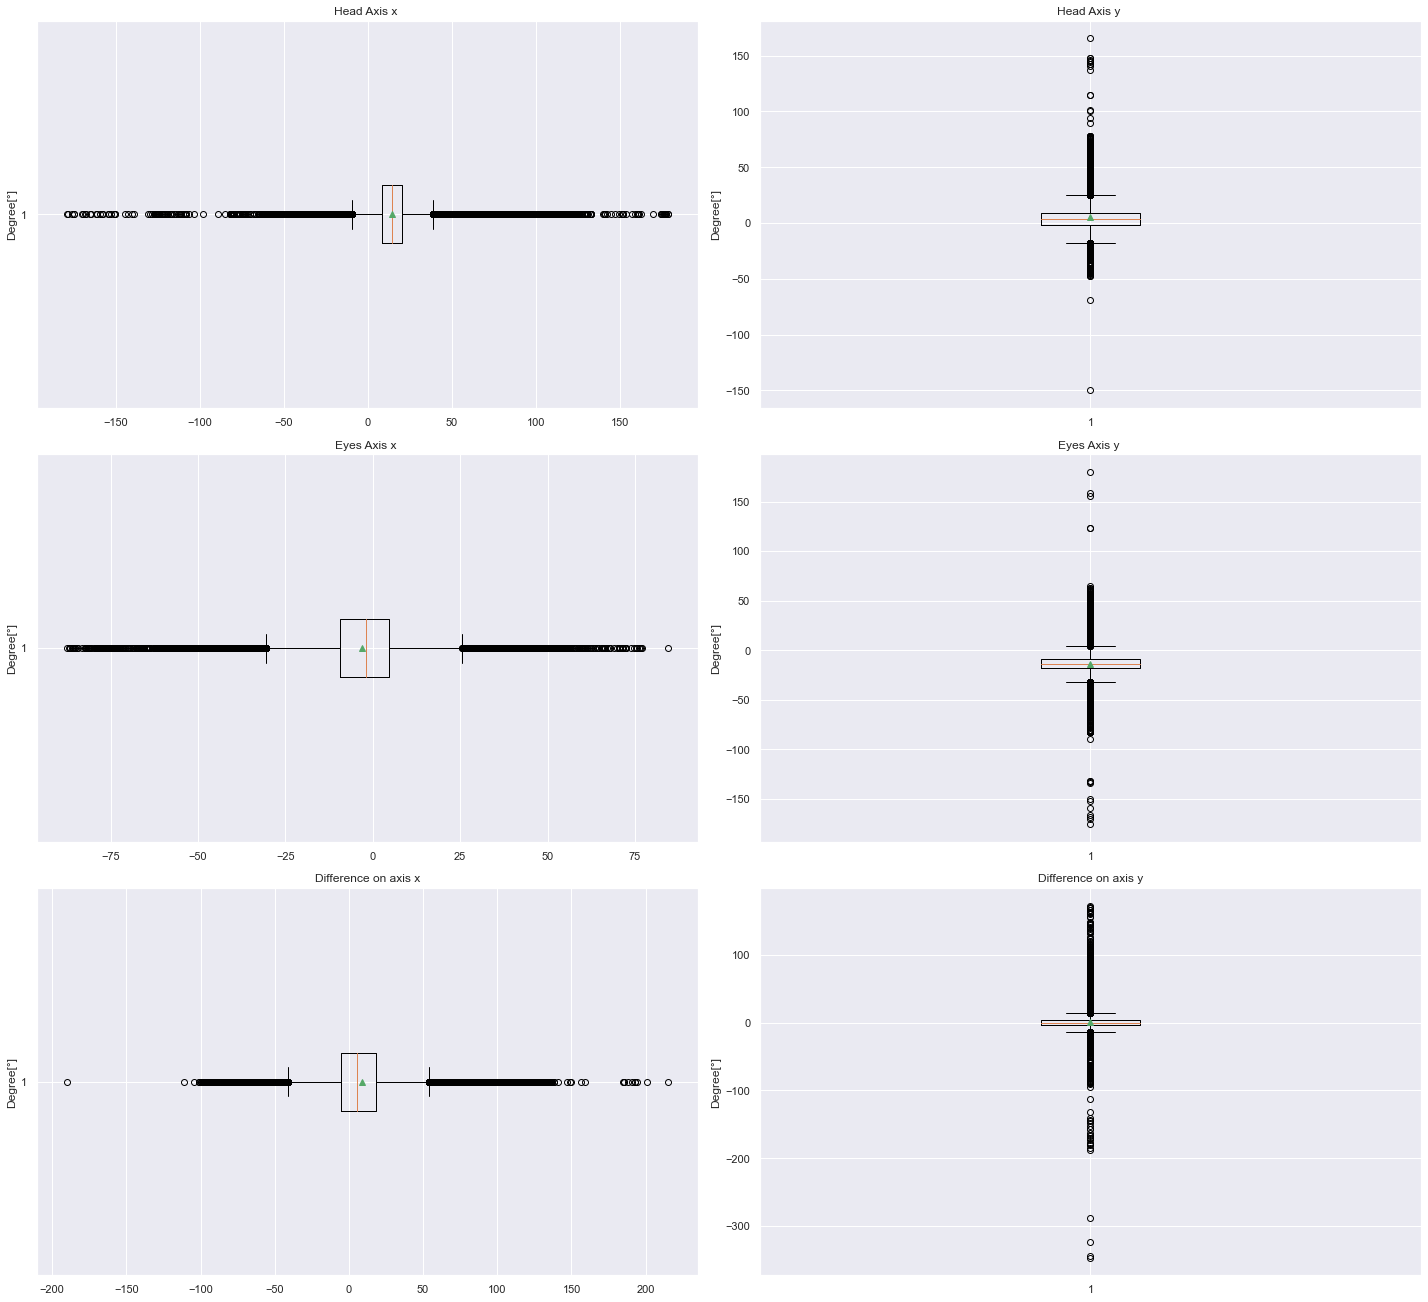

,Axis_y_head_Mean,Axis_y_eyes_Mean,Axis_x_head_Mean,Axis_x_eyes_Mean,Axis_y_diff_Mean,Axis_x_diff_Mean
webcam_2021-07-20-16-49.csv,-14.702555,-14.450957,1.947848,4.481694,0.080468,6.495773


In [38]:
def center_quantile10_90(x,q10,q90):
    return x<=q90 and x>=q10

# zoom in the quartile 10-90 
q10=df_ws_deg[' pose_Rx'].quantile(q=0.10)
q90=df_ws_deg[' pose_Rx'].quantile(q=0.90)
mask1=df_ws_deg[' pose_Rx'].apply(lambda x : center_quantile10_90(x,q10,q90))

# zoom in the quartile 10-90 
q10=df_ws_deg[' pose_Ry'].quantile(q=0.10)
q90=df_ws_deg[' pose_Ry'].quantile(q=0.90)
mask_y1=df_ws_deg[' pose_Ry'].apply(lambda x : center_quantile10_90(x,q10,q90))

# Now we can observe the field of vision for our subjects with as based for the analysis the following image
# zoom in the quartile 10-90 
q10=df_ws_deg[' gaze_angle_x'].quantile(q=0.10)
q90=df_ws_deg[' gaze_angle_x'].quantile(q=0.90)
mask_x2=df_ws_deg[' gaze_angle_x'].apply(lambda x : center_quantile10_90(x,q10,q90))

# Eyes Axis y
# zoom in the quartile 10-90 
q10=df_ws_deg[' gaze_angle_y'].quantile(q=0.10)
q90=df_ws_deg[' gaze_angle_y'].quantile(q=0.90)
mask_y2=df_ws_deg[' gaze_angle_y'].apply(lambda x : center_quantile10_90(x,q10,q90))

# Difference
df_ws_deg['diff_eyes_head_y [deg]']=df_ws_deg[' pose_Rx']-df_ws_deg[' gaze_angle_y']
df_ws_deg['diff_eyes_head_x [deg]']=df_ws_deg[' pose_Ry']-df_ws_deg[' gaze_angle_x']

# axis x
q10=df_ws_deg['diff_eyes_head_x [deg]'].quantile(q=0.10)
q90=df_ws_deg['diff_eyes_head_x [deg]'].quantile(q=0.90)
mask_diff_x=df_ws_deg['diff_eyes_head_x [deg]'].apply(lambda x : center_quantile10_90(x,q10,q90))

# axis y
q10=df_ws_deg['diff_eyes_head_y [deg]'].quantile(q=0.10)
q90=df_ws_deg['diff_eyes_head_y [deg]'].quantile(q=0.90)
mask_diff_y=df_ws_deg['diff_eyes_head_y [deg]'].apply(lambda x : center_quantile10_90(x,q10,q90))


# To make more sense, we changed the sign of the mean for the axis y of the head and the eyes 
# so that looking down will be represented by a "-" Warning!: the means are the means after taking the 10-90 percentile
# Following the same line of thought, we change the sign of axis x Eyes to be in the same referential than the head ( which is + mean right)

df_stat= pd.DataFrame(index={FILE},data={
            'Axis_y_head_Mean' : -df_ws_deg[mask1][' pose_Rx'].describe()['mean'],
            'Axis_y_eyes_Mean' : -df_ws_deg[mask_y1][' gaze_angle_y'].describe()['mean'], 
            'Axis_x_head_Mean' : df_ws_deg[mask_x2][' pose_Ry'].describe()['mean'],
            'Axis_x_eyes_Mean' : -df_ws_deg[mask_y2][' gaze_angle_x'].describe()['mean'], 
            'Axis_y_diff_Mean' : df_ws_deg[mask_diff_y]['diff_eyes_head_y [deg]'].describe()['mean'],
            'Axis_x_diff_Mean' : df_ws_deg[mask_diff_x]['diff_eyes_head_x [deg]'].describe()['mean']})
#plot
fig=plt.figure(figsize=(20,24))
for i,j,n in zip(df_ws_deg.columns,
               ['Head Axis y ','Eyes Axis y ','Head Axis x ','Eyes Axis x ','Difference on axis y','Difference on axis x'],[2,4,1,3,6,5]):
    #base plot + polyfit
    plt.subplot(4,2,n)
    invert_ax_bool= -1 if j in ['Eyes Axis x ','Eyes Axis y ','Head Axis y '] else 1
    vert= (" y" in j)
    plt.boxplot(invert_ax_bool*df_ws_deg[i],vert=vert,showmeans=True)
    plt.ylabel('Degree[°]')
    plt.title(j)
fig.tight_layout()
plt.show()
#show df_stat
df_stat

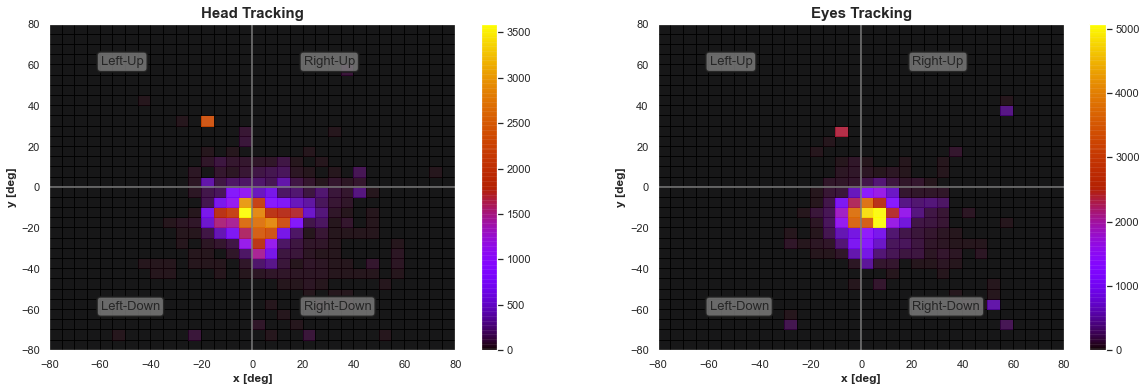

,Axis_y_head_Mean,Axis_y_eyes_Mean,Axis_x_head_Mean,Axis_x_eyes_Mean,Axis_y_diff_Mean,Axis_x_diff_Mean
webcam_2021-07-20-16-49.csv,-14.702555,-14.450957,1.947848,4.481694,0.080468,6.495773


In [39]:
#plot tete position
bbox = dict(boxstyle = "round", facecolor = 'grey',edgecolor = 'k',lw = 2, alpha = 0.8)
offset = 1
fig=plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
plt.hist2d(x=df_ws_deg[' pose_Ry'],y=-df_ws_deg[' pose_Rx'], bins=np.arange(-80, 80 + 5, 5),cmap="gnuplot",alpha=0.9)
plt.colorbar()# 32 square of 5 degree each bins=53.5->3 degree and 80 for 2 degrees
plt.title('Head Tracking',fontsize=15,fontweight='bold')
plt.xlim(-80, 80)
plt.ylim(-80,80)
plt.xlabel("x [deg]",fontweight='bold')
plt.ylabel("y [deg]",fontweight='bold')
plt.axvline(0, linestyle = '-', color = 'grey')
plt.axhline(0, linestyle = '-', color = 'grey')
plt.annotate('Right-Up'.format(20,60),
            (20,60), xytext=(0.6*offset, -0.1*offset), textcoords='offset points',
            bbox=bbox,fontsize=13)
plt.annotate('Left-Up'.format(-60,60),
            (-60,60), xytext=(0.6*offset, -0.1*offset), textcoords='offset points',
            bbox=bbox,fontsize=13)
plt.annotate('Right-Down'.format(20,-60),
            (20,-60), xytext=(0.6*offset, -0.1*offset), textcoords='offset points',
            bbox=bbox,fontsize=13)
plt.annotate('Left-Down'.format(-60,-60),
            (-60,-60), xytext=(0.6*offset, -0.1*offset), textcoords='offset points',
            bbox=bbox,fontsize=13)
                
#plot eyes position
plt.subplot(1,2,2)
plt.hist2d(x=-df_ws_deg[' gaze_angle_x'],y=-df_ws_deg[' gaze_angle_y'], bins=np.arange(-80, 80 + 5, 5),cmap="gnuplot",alpha=0.9) # 32 square of 5 degree each bins=53.5->3 degree et 80 pour 2degree
plt.colorbar()
plt.title('Eyes Tracking',fontsize=15,fontweight='bold')
plt.xlim(-80, 80)
plt.ylim(-80,80)
plt.xlabel("x [deg]",fontweight='bold')
plt.ylabel("y [deg]",fontweight='bold')
plt.axvline(0, linestyle = '-', color = 'grey')
plt.axhline(0, linestyle = '-', color = 'grey')
plt.annotate('Right-Up'.format(20,60),
            (20,60), xytext=(0.6*offset, -0.1*offset), textcoords='offset points',
            bbox=bbox,fontsize=13)
plt.annotate('Left-Up'.format(-60,60),
            (-60,60), xytext=(0.6*offset, -0.1*offset), textcoords='offset points',
            bbox=bbox,fontsize=13)
plt.annotate('Right-Down'.format(20,-60),
            (20,-60), xytext=(0.6*offset, -0.1*offset), textcoords='offset points',
            bbox=bbox,fontsize=13)
plt.annotate('Left-Down'.format(-60,-60),
            (-60,-60), xytext=(0.6*offset, -0.1*offset), textcoords='offset points',
            bbox=bbox,fontsize=13)
plt.show()

# To make more sense, we changed the sign of the mean for the axis y of the head and the eyes 
# so that looking down will be represented by a "-" Warning the mean are the means after taking the 10-90 percentile

df_stat= pd.DataFrame(index={FILE},data={
            'Axis_y_head_Mean' : -df_ws_deg[mask1][' pose_Rx'].describe()['mean'],
            'Axis_y_eyes_Mean' : -df_ws_deg[mask_y1][' gaze_angle_y'].describe()['mean'], 
            'Axis_x_head_Mean' : df_ws_deg[mask_x2][' pose_Ry'].describe()['mean'],
            'Axis_x_eyes_Mean' : -df_ws_deg[mask_y2][' gaze_angle_x'].describe()['mean'], 
            'Axis_y_diff_Mean' : df_ws_deg[mask_diff_y]['diff_eyes_head_y [deg]'].describe()['mean'],
            'Axis_x_diff_Mean' : df_ws_deg[mask_diff_x]['diff_eyes_head_x [deg]'].describe()['mean']})
df_stat

Note that (0,0) represents looking straight 



---------------------------------------------------

## 4. Survey Analysis

Only done in the notebook "Analysis.ipynb" to compare every statistics ( Pupil size ; Bink/min/test ; ... ) of each reliable csv.

---------------------------------------------------